# Uniformly Distributing Galaxies with different elipticities in Space.
Defining sticks within a box modelled as galaxies with uniformly distributed $q=\frac{b}{a}$ eccentricity and $\phi$ position angle.

In [2]:
!pip install fitsio
!pip install treecorr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.1.10-cp310-cp310-linux_x86_64.whl size=2051345 sha256=d0a3e4e1cf28584b34bc848f950bf94312ec355d86248a2f62447c0736a4896e
  Stored in directory: /root/.cache/pip/wheels/db/8e/0a/f1f3d391dada5c1b7b0960f4fd94b676c49b2814c50184aeab
Successfully built fitsio
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.8 MB/s eta 0:00:00


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import treecorr
import time
import fitsio

$q$ of a galaxy will be modelled as the length of a stick. $q=\frac{b}{a}$ where a and b are the major and minor axes of an ellipse.


Eccentricity of an ellipse:
$ ϵ=\frac{1-q}{1+q} e^{2i\phi} $

An eccentricity of 0 will mean a circular galaxy. A circular galacy will have $q=b/a=1$ and the corresposing bar will have a lenth of 1 on the plot.

In [102]:
def elliptical_gen(N):
  '''Generates N galaxies at uniformly random positions with normally disributed ellipticities
    in a 2D box.
     Outputs: (2x2xN) array 1st index x, y corrdinate,
                            2nd index the upper and lower end of the stick
                            3rd index N sticks
  '''
  global x, y, g1, g2
  # size of square box
  L = 100
  # randomly distribute x, y values (centre of stick)
  x = np.random.uniform(low=0.0, high=L, size=N)
  y = np.random.uniform(low=0.0, high=L, size=N)
  # randomly distribute elipticities
  phi = np.random.uniform(low=0.0, high=np.pi, size=N) # angle phi defined from positive x axis
  a = 1
  b = abs(np.random.normal(0.0, 1, size=N))
  q = b / a
  q[q>1] = 1/q[q>1]
  g1 = (1-q)/(1+q) * np.cos(2*phi)
  g2 = (1-q)/(1+q) * np.sin(2*phi)
  # for visulaisation

  del_y = b*np.sin(phi)
  del_x = b*np.cos(phi)

  barx = np.array([x+del_x,x-del_x])
  bary = np.array([y+del_y,y-del_y])
  bars = np.array([barx,bary])
  #print('shape: ', bars.shape)
  return bars

Plotting the bars representing galaxies.

Text(0.5, 1.0, 'Sandbox of 90 Galaxies')

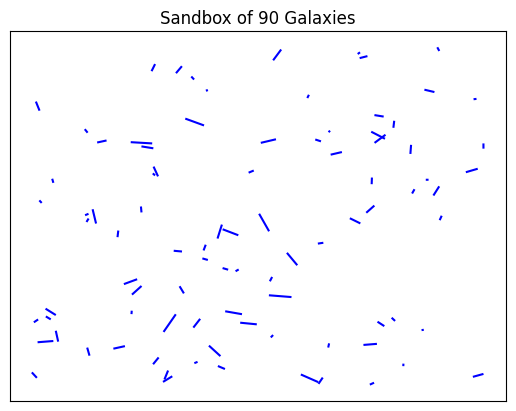

In [103]:
N = 90
bars = elliptical_gen(N)
#plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(bars[0,:,i],bars[1,:,i],color='b')

plt.xticks([])
plt.yticks([])
plt.title('Sandbox of %i Galaxies' % N)

Finding the two point Shear-Shear correlation of the Galaxies.

In [104]:
rand = treecorr.Catalog(x=x, y=y, g1=g1, g2=g2) # two shear values (g1, g2) -> (ellipticity and angle)
gg = treecorr.GGCorrelation(min_sep=0.1, max_sep=150, nbins=150)#, sep_units='arcmin')
print('bin_size = %.6f'%gg.bin_size)
t1 = time.time()
gg.process(rand)  # Takes approx 1 minute / million objects
t2 = time.time()
print('Time for calculating gg correlation = ',t2-t1)

bin_size = 0.048755
Time for calculating gg correlation =  0.00795745849609375


(150,)


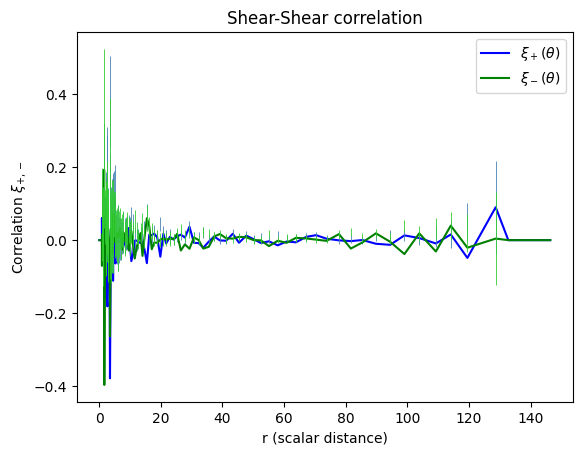

In [105]:
# Plotting results
r = np.exp(gg.meanlogr)
xip = gg.xip
xim = gg.xim
sig = np.sqrt(gg.varxip)
print(xip.shape)

lp = plt.plot(r, xip, color='blue', label =r'$\xi_+(\theta)$')
#plt.plot(r, -xip, color='blue', ls=':')
plt.errorbar(r[xip>0], xip[xip>0], yerr=sig[xip>0], color='blue', ecolor='steelblue', lw=0.6, ls='')
plt.errorbar(r[xip<0], -xip[xip<0], yerr=sig[xip<0], color='blue', ecolor='steelblue', lw=0.6, ls='')
#plt.errorbar(-r, xip, yerr=sig, color='blue')

lm = plt.plot(r, xim, color='green',label=r'$\xi_-(\theta)$')
#plt.plot(r, -xim, color='green', ls=':')
plt.errorbar(r[xim>0], xim[xim>0], yerr=sig[xim>0], color='green', ecolor='limegreen', lw=0.6, ls='')
plt.errorbar(r[xim<0], -xim[xim<0], yerr=sig[xim<0], color='green', ecolor='limegreen', lw=0.6, ls='')
#plt.errorbar(-r, xim, yerr=sig, color='green')

#plt.xscale('log')
# plt.yscale('log', nonpositive='clip')
plt.xlabel(r'r (scalar distance)')

plt.legend()
# plt.xlim( [1,200] )
plt.ylabel(r'Correlation $\xi_{+,-}$')
plt.title('Shear-Shear correlation')
plt.show()

Kappa-Kappa Correlation function

In [37]:
# rand = treecorr.Catalog(x=x, y=y, g1=q, g2=phi, k = np.random.uniform(low=0.0, high=1, size=N)) # just testing w random kappa values
# kk = treecorr.KKCorrelation(min_sep=0.1, max_sep=150, bin_size=0.05)#, sep_units='arcmin')
# gg.process(rand)
# print('bin_size = %.6f'%gg.bin_size)
# t1 = time.time()
# kk.process(rand)  # Takes approx 1 minute / million objects
# t2 = time.time()
# print('Time for calculating gg correlation = ',t2-t1)

In [36]:
# r = np.exp(kk.meanlogr)
# xi = kk.xi
# sig = np.sqrt(kk.varxi)

# plt.plot(r, xi, color='blue')
# #plt.plot(r, -xi, color='blue', ls=':')
# plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', ecolor='steelblue', lw=0.6, ls='')
# plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', ecolor='steelblue', lw=0.6, ls='')
# #plt.errorbar(-r, xi, yerr=sig, color='blue')

# # plt.xscale('log')
# # plt.yscale('log', nonpositive='clip')
# plt.xlabel(r'r (scalar distance)')

# # plt.legend([lp, lm], [r'$\xi_+(\theta)$', r'$\xi_-(\theta)$'])
# # plt.xlim( [1,200] )
# plt.ylabel(r'$\xi_{+}$')
# plt.title('Kappa-Kappa correlation')
# plt.show()

## Looping this process and plotting results.

In [107]:
nbins = 150 # number of bins
aggregate_corr = np.zeros((1000,2,nbins))
for i in range(1000):        # 1000 times
    bars = elliptical_gen(N)
    rand = treecorr.Catalog(x=x, y=y, g1=g1, g2=g2) # two shear values (g1, g2) -> (ellipticity and angle)
    gg = treecorr.GGCorrelation(min_sep=0.1, max_sep=150, nbins=nbins)#, sep_units='arcmin')
    gg.process(rand)
    if i ==0:
        r = np.exp(gg.meanlogr)
    aggregate_corr[i,0,:] =  gg.xip
    aggregate_corr[i,1,:] =  gg.xim


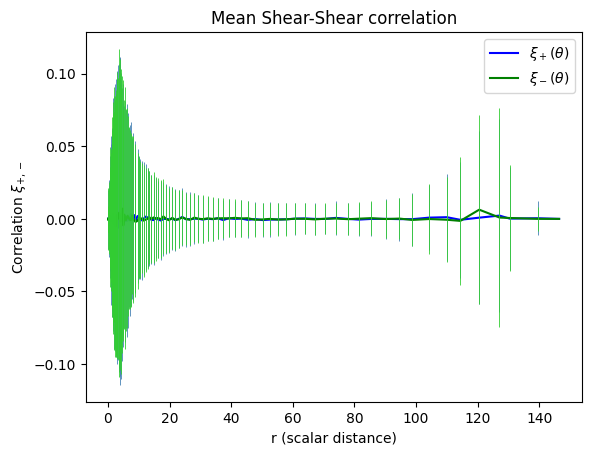

In [109]:
mean_corr = np.mean(aggregate_corr, axis=0)
sd_corr = np.std(aggregate_corr, axis=0)

plt.plot(r, mean_corr[0,:], color='blue', label =r'$\xi_+(\theta)$')
plt.errorbar(r, mean_corr[0,:], yerr=sd_corr[0,:], color='blue', ecolor='steelblue', lw=0.6, ls='')
plt.plot(r, mean_corr[1,:], color='green', label=r'$\xi_-(\theta)$')
plt.errorbar(r, mean_corr[1,:], yerr=sd_corr[1,:], color='green', ecolor='limegreen', lw=0.6, ls='')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi_{+,-}$')
plt.title('Mean Shear-Shear correlation')
plt.legend()
plt.show()

# Now Adding Dots to Toy Model

In [110]:
def dot_gen(N):
  '''Generates N lenses at uniformly random positions.
     Outputs: (2xN) array 1st index x, y corrdinate,
                            2rd index N dots
  '''
  global xd, yd
  # size of square box
  L = 100
  # randomly distribute x, y values (centre of stick)
  xd = np.random.uniform(low=0.0, high=L, size=N)
  yd = np.random.uniform(low=0.0, high=L, size=N)

  dots = np.array([xd,yd])

  return dots

Text(0.5, 1.0, 'Sandbox of bars and dots')

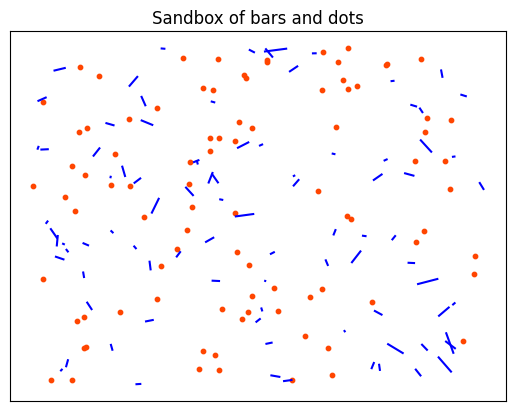

In [112]:
Nd = 90
dots = dot_gen(Nd)
plt.scatter(dots[0],dots[1], s=10, color='orangered')

N = 90
bars = elliptical_gen(N)
#plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(bars[0,:,i],bars[1,:,i],color='b')

plt.xticks([])
plt.yticks([])
plt.title('Sandbox of bars and dots')

In [113]:
cat1 = treecorr.Catalog(x=x, y=y, g1=g1, g2=g2) # two shear values (g1, g2) -> (ellipticity and angle)
cat2 = treecorr.Catalog(x=xd, y=yd)
ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=150, nbins=150)#, sep_units='arcmin')
print('bin_size = %.6f'%gg.bin_size)
t1 = time.time()
ng.process(cat2,cat1)  # Takes approx 1 minute / million objects
t2 = time.time()
print('Time for calculating gg correlation = ',t2-t1)

bin_size = 0.048755
Time for calculating gg correlation =  0.013447999954223633


(150,)


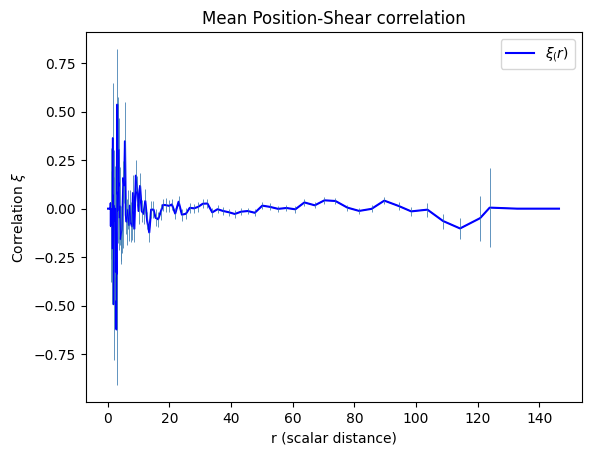

In [114]:
# Plotting results
r = np.exp(ng.meanlogr)
xi = ng.xi
sigma = np.sqrt(ng.varxi)
print(xi.shape)

plt.plot(r, xi, color='blue', label =r'$\xi(r)$')
plt.errorbar(r, xi, yerr=sigma, color='blue', ecolor='steelblue', lw=0.6, ls='solid')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Mean Position-Shear correlation')
plt.legend()
plt.show()

# Looping this process for GI correlation.

In [115]:
nbins = 150 # number of bins
aggregate_corr = np.zeros((1000,nbins))
for i in range(1000):        # 1000 times
  bars = elliptical_gen(N)
  dots = dot_gen(Nd)

  cat1 = treecorr.Catalog(x=x, y=y, g1=q, g2=phi) # two shear values (g1, g2) -> (ellipticity and angle)
  cat2 = treecorr.Catalog(x=xd, y=yd)
  ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=150, nbins=150)#, sep_units='arcmin')
  ng.process(cat2,cat1)  # Takes approx 1 minute / million objects
  if i ==0:
    r = np.exp(ng.meanlogr)
  aggregate_corr[i,:] =  ng.xi


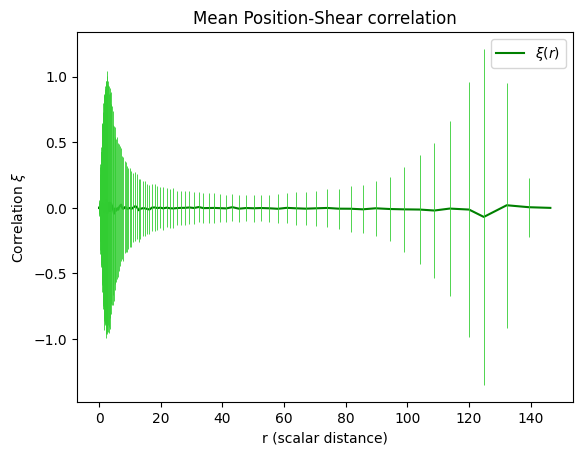

In [118]:
mean_corr = np.mean(aggregate_corr, axis=0)
sd_corr = np.std(aggregate_corr, axis=0)

plt.plot(r, mean_corr, color='green', label=r'$\xi(r)$')
plt.errorbar(r, mean_corr, yerr=sd_corr, color='green', ecolor='limegreen', lw=0.6, ls='')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Mean Position-Shear correlation')
plt.legend()
plt.show()